# How to Check if Time Series Data is Stationary with Python
https://machinelearningmastery.com/time-series-data-stationary-python/

Time series is different from more traditional classification and regression predictive modeling problems.

The temporal structure adds an order to the observations. This imposed order means that important assumptions about the consistency of those observations needs to be handled specifically.

For example, when modeling, there are assumptions that the summary statistics of observations are consistent. In time series terminology, we refer to this expectation as the time series being stationary.

These assumptions can be easily violated in time series by the addition of a trend, seasonality, and other time-dependent structures.

## Stationary Time Series
The observations in a stationary time series are not dependent on time.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.


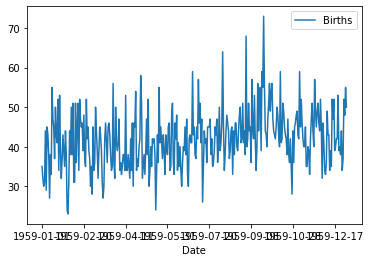

In [2]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
# series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv", header=0, index_col=0)
series.plot()
pyplot.show()

## Non-Stationary Time Series
Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.

Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.

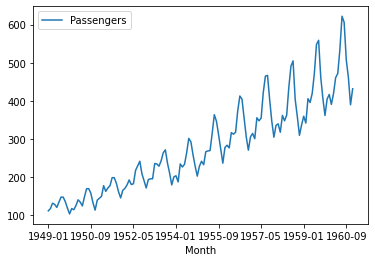

In [3]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
series.plot()
pyplot.show()

* Stationary Process: A process that generates a stationary series of observations.
* Stationary Model: A model that describes a stationary series of observations.
* Trend Stationary: A time series that does not exhibit a trend.
* Seasonal Stationary: A time series that does not exhibit seasonality.
* Strictly Stationary: A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.

Should make stationary for ML
* If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals.

We turn to machine learning methods when the classical methods fail. When we want more or better results. We cannot know how to best model unknown nonlinear relationships in time series data and some methods may result in better performance when working with non-stationary observations or some mixture of stationary and non-stationary views of the problem.

The suggestion here is to treat properties of a time series being stationary or not as another source of information that can be used in feature engineering and feature selection on your time series problem when using machine learning methods.

## Checks for Stationarity
There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.

1. Look at Plots: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
2. Summary Statistics: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
3. Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have been violated.


### Summary Statistics
A quick and dirty check to see if your time series is non-stationary is to review summary statistics.

You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

#### Daily Births dataset.

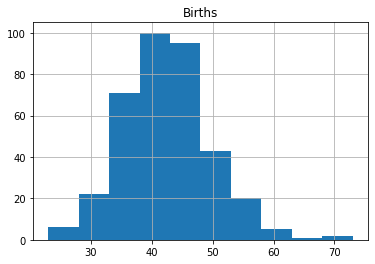

In [6]:

# from pandas import read_csv
from matplotlib import pyplot
series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv", header=0, index_col=0)

# series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
series.hist()
pyplot.show()

# Gausian - bell curve perhaps longer tail to the right

Next, we can split the time series into two contiguous sequences. We can then calculate the mean and variance of each group of numbers and compare the values.

In [8]:
from pandas import read_csv
# series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


#### Airline Passengers Dataset

In [13]:
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
X = series.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

#  mean and variance look very different.

# We have a non-stationary time series.

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


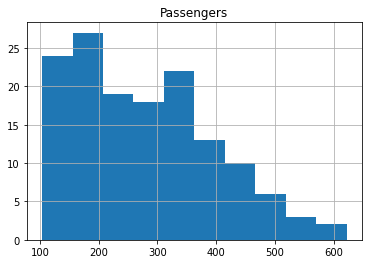

In [14]:
# Check if Gaussian - plot histogram

from pandas import read_csv
from matplotlib import pyplot
# series = read_csv('international-airline-passengers.csv', header=0, index_col=0)
series.hist()
pyplot.show()

# Not gaussian therefore mena and variance values less meaningful

(This squashed distribution of the observations may be another indicator of a non-stationary time series.)

Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing.

This may suggest an exponential growth from season to season. A log transform can be used to flatten out exponential change back to a linear relationship.

Below is the same histogram with a log transform of the time series.

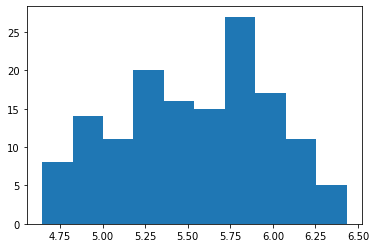

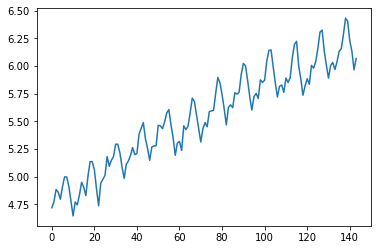

In [16]:
from numpy import log
X = series.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

# Running the example, we can see the more familiar Gaussian-like or Uniform-like distribution of values.

We also create a line plot of the log transformed data and can see the exponential growth seems diminished, but we still have a trend and seasonal elements.

We can now calculate the mean and standard deviation of the values of the log transformed dataset.

In [17]:
from numpy import log
X = series.values
X = log(X)
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


Running the examples shows mean and standard deviation values for each group that are again similar, but not identical.

Perhaps, from these numbers alone, we would say the time series is stationary, but we strongly believe this to not be the case from reviewing the line plot.

We can use a statistical test to check if the difference between two samples of Gaussian random variables is real or a statistical fluke. We could explore statistical significance tests, like the Student t-test, but things get tricky because of the serial correlation between values.

### Augmented Dickey-Fuller test
Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject. The result must be interpreted for a given problem to be meaningful.

Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The **Augmented Dickey-Fuller** test is a type of statistical test called a **unit root test**.

The intuition behind a unit root test is that it determines **how strongly a time series is defined by a trend**.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

* Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Below is an example of calculating the Augmented Dickey-Fuller test on the Daily Female Births dataset. The statsmodels library provides the adfuller() function that implements the test.



In [18]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv", header=0, index_col=0)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Running the example prints the test statistic value of -4. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

In [19]:
# test airline

from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Running the example gives a different picture than the above. The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).

Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.



In [20]:
# look at log transform of dataset
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
X = series.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
	1%: -3.482
	5%: -2.884
	10%: -2.579


We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

## Null hypotheses - time serries non-stationary
